This notebook is used to test that the functions are working properly (entering an input with a already known output) and to compare the hourly to quarter-hourly, the winter to spring and a long to short time series results.

In [71]:
import os
import glob
import datetime
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import angles

import netCDF4 as nc
from scipy.optimize import curve_fit
from salishsea_tools import (viz_tools,tidetools as tt, nc_tools)
from salishsea_tools.nowcast import (research_VENUS, analyze)

%matplotlib inline

#Testing the functions
##Narrow Inlet
In a narrow inlet we expect a rectilinear tidal ellipse, a cos function for the u velcoties and 0 for the v velocities. If everything is working properly the output should be a line.

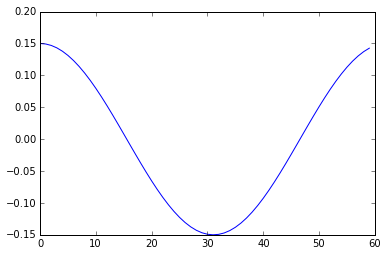

In [72]:
uamp = 0.15
upha = 0
vamp= 0
vpha = 0

x = np.arange(0,12,.2)

u = uamp*np.cos(tt.M2FREQ*x + upha)
v = vamp*np.cos(tt.M2FREQ*x + vpha)

plt.plot(u)


In [73]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,x)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,x)

In [74]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

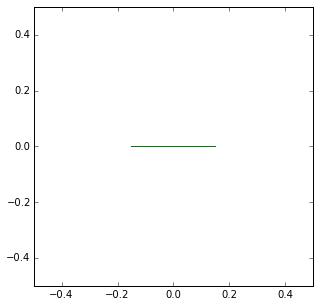

In [75]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
x=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*x)+SX*np.sin(tt.M2FREQ*x),
         CY*np.cos(tt.M2FREQ*x)+SY*np.sin(tt.M2FREQ*x));

As expected the tidal ellipse is rectilinear.
##Open-ocean Test
In the open ocean u and v should have the same amplitude and phase. One will be cos and one will be sin. We expect the tidal ellipse results to be a circle.

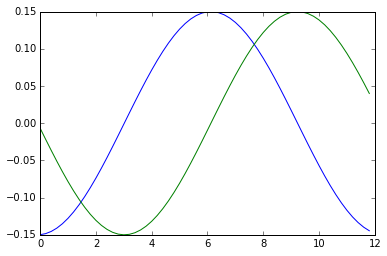

In [76]:
uamp = 0.15
upha = 110
vamp= 0.15
vpha = 110

x = np.arange(0,12,.2)

u = uamp*np.cos(tt.M2FREQ*x + upha)
v = vamp*np.sin(tt.M2FREQ*x + vpha)

plt.plot(x, u)
hold=True
plt.plot(x, v)

In [77]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,x)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,x)

In [78]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

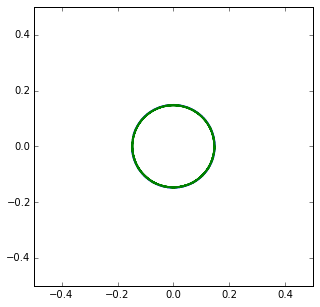

In [79]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
x=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*x)+SX*np.sin(tt.M2FREQ*x),
         CY*np.cos(tt.M2FREQ*x)+SY*np.sin(tt.M2FREQ*x));

As expected the tidal ellipse is a circle.

##Testing phase 

###Case A: phase = 0

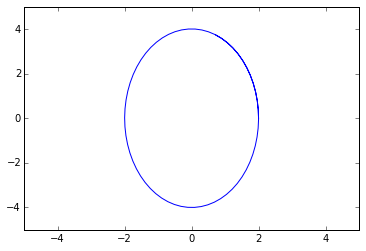

In [141]:
phi = 0
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)
u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)


In [142]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha

1.99999999771 1.23276171049e-07


In [143]:
CX, SX, CY, SY, ap, am, ep, em, majora, minora, thetaa, phasea= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

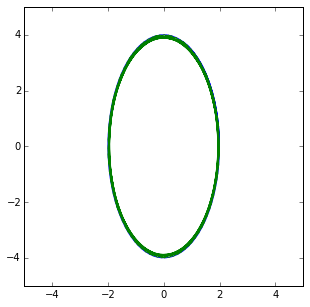

In [144]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phasea)+SX*np.sin(tt.M2FREQ*t-phasea),
         CY*np.cos(tt.M2FREQ*t-phasea)+SY*np.sin(tt.M2FREQ*t-phasea));

In [145]:
print majora, minora, thetaa, phasea

3.99999999895 1.99999999771 89.9999999256 269.999999975


###Case B phase= 100

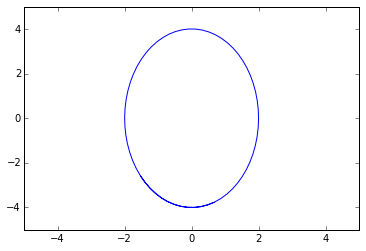

In [146]:
phi = 15 #np.deg2rad(0)
w1 = 2
w2 = 4

t = np.arange(0,15,.2)
plt.xlim(-5,5)
plt.ylim(-5,5)

u = w1*np.cos(tt.M2FREQ*t-phi)
v = w2*np.sin(tt.M2FREQ*t-phi)
plt.plot(u,v)

In [147]:
uM2amp, uM2pha, uK1amp, uK1pha = tt.fittit(u,t)
vM2amp, vM2pha, vK1amp, vK1pha = tt.fittit(v,t)
print uM2amp, uM2pha, vM2pha

1.99999999902 139.436692589 -130.563307313


In [148]:
uM2pha = uM2pha+180
vM2pha = vM2pha+180

In [149]:
CX, SX, CY, SY, ap, am, ep, em, major, minor, theta, phase= tt.ellipse_params(uM2amp, uM2pha, vM2amp, vM2pha)

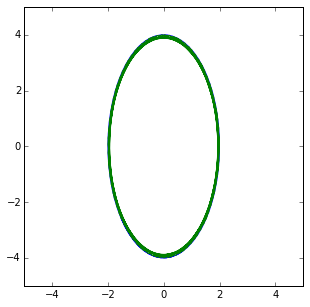

In [150]:
plt.figure(figsize=(5,5))
plt.plot(u,v)
plt.xlim(-5,5)
plt.ylim(-5,5)
t=np.arange(0,95)
plt.plot(CX*np.cos(tt.M2FREQ*t-phi)+SX*np.sin(tt.M2FREQ*t-phi),
         CY*np.cos(tt.M2FREQ*t-phi)+SY*np.sin(tt.M2FREQ*t-phi));

In [151]:
print theta, phase, phase-phasea

90.0000000656 229.43669272 -40.5633072544


The difference between the phases should be the same as the original difference between the phis and all the other parameters should remain the same.
We are calculating phase properly because this is true.

We added the floor function in the ellipse param code and now my conclusion above is no longer true...